# Signal around ZEB instances

Look at ZEB and BATF control motifs that are present in control peaks.

Based on `20210321_ZEB_vPlot/Signal.ipynb`.

**Inputs:**
1. A BED file with ZEB instances present in peaks in both fibroblasts and iPSCs.
2. Insertion bigwigs for the control sample.

In [2]:
library(rtracklayer)
library(GenomicRanges)
library(ggplot2)
library(patchwork)

## Load Input Data

In [5]:
zeb_idr_hits = read.table("./data/ZEB.control.idr.500.bed")
colnames(zeb_idr_hits) = c("chr", "start", "end", "strand", "score", "seq")
zeb_idr_hits = GRanges(zeb_idr_hits)

zeb_idr_hits

GRanges object with 2615 ranges and 2 metadata columns:
         seqnames              ranges strand |     score          seq
            <Rle>           <IRanges>  <Rle> | <numeric>     <factor>
     [1]    chr18   10543053-10543064      - |   7.07787 GCACACCTATAA
     [2]     chr2 156400564-156400575      + |  9.235628 TCCCAGGTGAGC
     [3]    chr10   79152233-79152244      - |  8.491386 TCACACCTGTAA
     [4]     chr1   26035797-26035808      + | 10.271836 AGGCAGGTGTGC
     [5]     chr1   26036391-26036402      - |  7.571599 ACCCACCTGGAG
     ...      ...                 ...    ... .       ...          ...
  [2611]     chr6 167893612-167893623      - |  8.329684 ACTCACCTGTTG
  [2612]     chr6 167893827-167893838      - |   7.43763 CTTCACCTGGGT
  [2613]     chr8   81051292-81051303      + |  7.058443 AGGCAGGTGCCC
  [2614]    chr17   82051519-82051530      + |  7.869753 ATCCAGGTGCGC
  [2615]    chr17   82051944-82051955      + |  7.227325 GTTCAGGTGTTT
  -------
  seqinfo: 23 sequences 

In [14]:
# TODO: prepare file in more reproducible manner
# Can use this for control
batf_idr_hits = read.table("./data/BATF.control.idr.500.bed")
colnames(batf_idr_hits) = c("chr", "start", "end", "strand", "score", "seq")
batf_idr_hits = GRanges(batf_idr_hits)

batf_idr_hits

GRanges object with 3762 ranges and 2 metadata columns:
         seqnames              ranges strand |     score        seq
            <Rle>           <IRanges>  <Rle> | <numeric>   <factor>
     [1]    chr14 101862340-101862349      - |  8.448558 GTGAGTCACC
     [2]     chr2 156400016-156400025      + |  7.249855 TATGACTAAG
     [3]    chr10   79151876-79151885      + |  8.530376 CATGAGTCAG
     [4]     chr3   28349661-28349670      + |  7.876577 AATTAGTCAT
     [5]     chr3   28349794-28349803      - |  7.083893 ATTACTCACC
     ...      ...                 ...    ... .       ...        ...
  [3758]    chr14   55514963-55514972      - |  9.413397 ATGAGTCAGC
  [3759]     chr6 167893609-167893618      - |  8.501933 GTGACTCACC
  [3760]     chr8   81050782-81050791      - |  7.707656 GTGAGTCAAC
  [3761]     chr8   81051282-81051291      + |  6.702199 TATGAATCAC
  [3762]    chr14   71142084-71142093      + |  8.711171 GCTGAGTCAG
  -------
  seqinfo: 23 sequences from an unspecified genome

## Process

In [6]:
get_matrix_from_bigwig <- function(bigwig_path, peak_set) {
    # ensure peak set has fixed width
    stopifnot(length(unique(width(peak_set)))==1)
    
    as.matrix(import(bigwig_path, 
      which=peak_set, as="NumericList"))
}

In [93]:
zeb_insertions_control = get_matrix_from_bigwig("~/oak/projects/SMC_ZEB_KD_TomQ/bigwigs/control.bw",
                                    resize(zeb_idr_hits, width = 500, fix = "center"))

In [94]:
batf_insertions_control = get_matrix_from_bigwig("~/oak/projects/SMC_ZEB_KD_TomQ/bigwigs/control.bw",
                                    resize(batf_idr_hits, width = 500, fix = "center"))

## Plotting

In [101]:
make_pileup <- function(m, title, ylabel=F, subsample=5) {
    to_plot = colMeans(matrix(m, ncol=(ncol(m)/subsample)))
#     to_plot = to_plot/max(to_plot)

    p <- ggplot(data.frame(x=seq(-floor(ncol(m)/2), 
                           floor(ncol(m)/2)-1, subsample), 
                  y=to_plot)) +
    geom_line(aes(x=x,y=y), size=0.5) +
    ggtitle(title) +
    xlab("Position Relative to Motif") +
    ylab("tn5 Insertions") + 
    theme_bw(base_size=26) +
    theme(plot.title = element_text(hjust = 0.5),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank())
    
    if (ylabel==F) {
        p = p + theme(axis.title.y=element_blank())
    }
    
    p
}

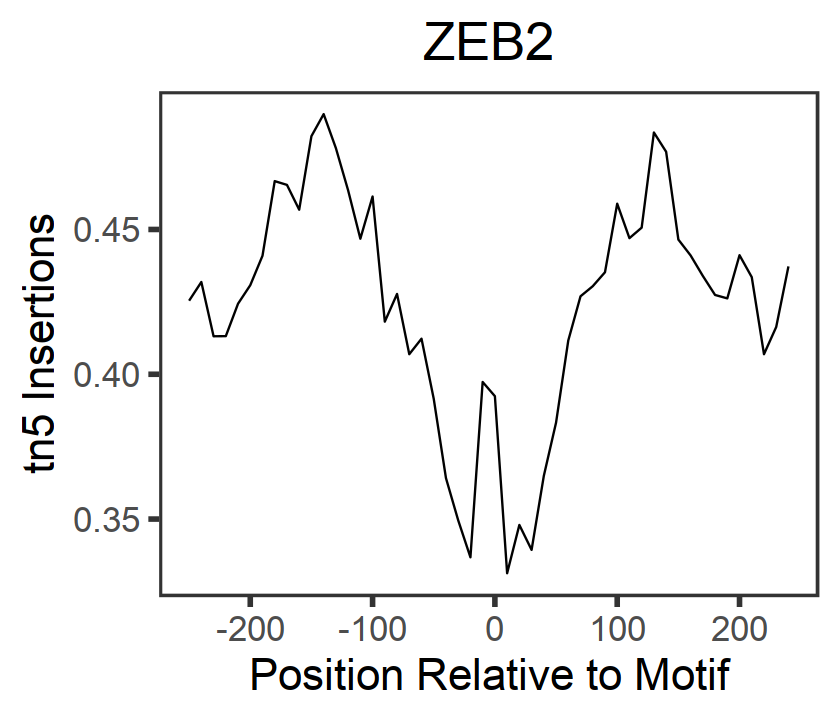

In [119]:
options(repr.plot.width = 7, repr.plot.height = 6)

p <- make_pileup(zeb_insertions_control, "ZEB2", ylabel=T, subsample = 10) # | make_pileup(zeb_insertions_ipsc, "iPSC", ylabel=F)
p

In [120]:
ggsave("ZEB.pdf", p, width=7, height=6)

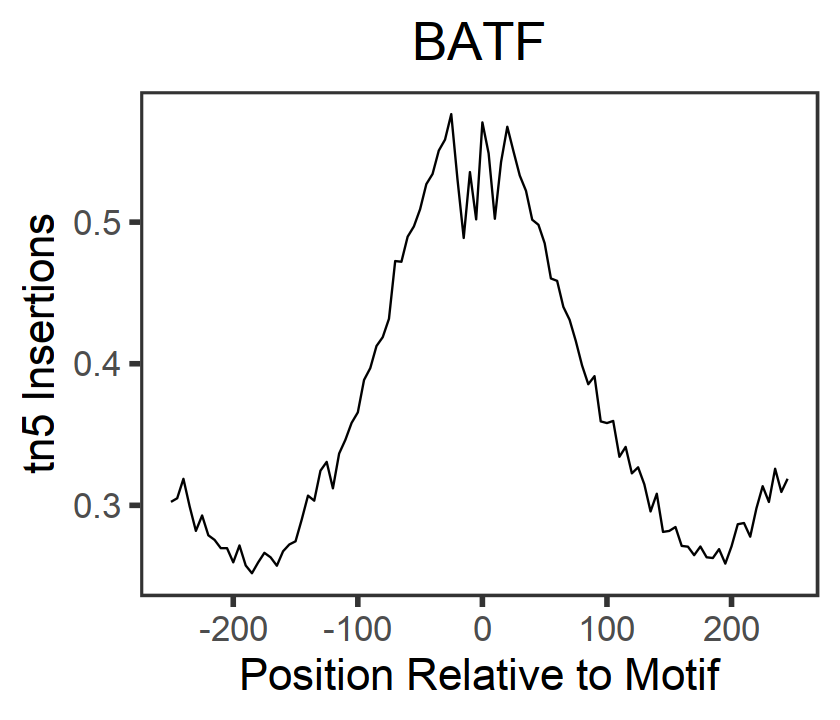

In [121]:
options(repr.plot.width = 7, repr.plot.height = 6)

p <- make_pileup(batf_insertions_control, "BATF", ylabel=T, subsample = 5) 
p 

In [122]:
ggsave("BATF.pdf", p, width=7, height=6)